In [514]:
import random
import numpy as np
from math import floor
import matplotlib.pyplot as plt
from sklearn import datasets, svm

#use scikit-learn's digits toy dataset
digits = datasets.load_digits()
print('Size of X is', digits.data.shape)

Size of X is (1797, 64)


In [515]:
#80% training data, 10% CV data, 10% test data, random selection later
train_images = digits.images[:floor(len(digits.images) * .8)]
CV_images = digits.images[floor(len(digits.images) * .8): -floor(len(digits.images) * .1)]
train_target = digits.target[:floor(len(digits.images) * .8)]
CV_target = digits.target[floor(len(digits.images) * .8): -floor(len(digits.images) * .1)]

In [516]:
#Train parameters
svc = svm.SVC(2)
fit = svc.fit(np.array(train_images).reshape(-1,64), np.array(train_target).reshape(-1,1))

/Users/nsortur/.conda/envs/untitled/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [517]:
#Evaluate on CV set
predictions = svc.predict(np.array(CV_images).reshape(-1,64))
CV_target2 = np.array(CV_target)
error = np.mean(predictions != CV_target2)
print(f'Our error is {np.around(error * 100, 10)}%')

Our error is 3.8674033149%


The number we are predicting is 2
SVC predicts: [2]


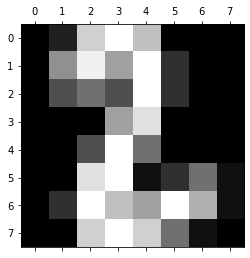

In [518]:
#Predict and visualize given number numIndex
#numIndex is index in digits dataset ranging from 0 to 1797
numIndex = 1600
num = digits.images[numIndex]
print('The number we are predicting is', digits.target[numIndex])
plt.matshow(num)
print('SVC predicts:', svc.predict(np.array(digits.images[numIndex]).reshape(-1, 64)))